## Prueba #0204

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Leer los datos.

In [2]:
# Ir al directorio en el que se encuentra el archivo. 
os.chdir(r'./')                # Reemplazar por la ruta correcta.

In [3]:
df = pd.read_csv('data_coffeeshop.csv', header='infer',na_values=[' '])

In [4]:
df.shape

(43182, 3)

In [5]:
df.head(5)

,yearOfStart,CurrentState,sizeOfsite
0,2008.0,In,20.80
1,2010.0,In,212.72
2,2013.0,In,20.04
3,2012.0,In,64.17
4,2002.0,Out,11.40


#### Responda las siguientes cuestiones.

1). Haga una tabla de frecuencia de 'yearOfStart' y visualícela por año.
- Ordenar por año.
- Dibuje una gráfica de línea de 1997 a 2014. <= Pista: plt.xlim ()

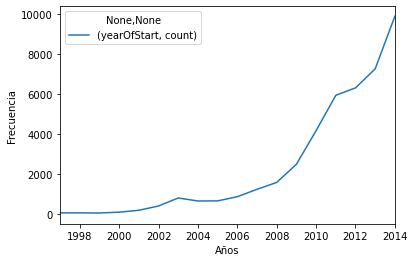

In [6]:
graf = df.groupby(['yearOfStart']).agg({'yearOfStart': ['count']}).plot()
plt.xlim([1997,2014])
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.show()

2). Ahora, divida los datos por el estado actual del negocio ('In' o 'Out' del negocio). Luego, visualice la tendencia anual de las frecuencias 'yearOfStart'.
- Ordenar por año.
- Dibuja dos gráficos de líneas superpuestas de 1997 a 2014.
- Use el objeto 'figure'.

In [7]:

df['CurrentState'].value_counts()

In     30004
Out    13159
Name: CurrentState, dtype: int64

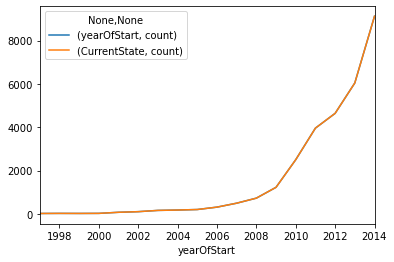

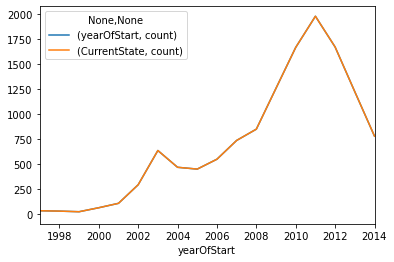

In [8]:
solo_in = df[df['CurrentState'] == 'In']
solo_out = df[df['CurrentState'] == 'Out']

solo_in = solo_in.groupby(['yearOfStart']).agg({'yearOfStart': ['count'], 'CurrentState': ['count']}).plot()
plt.xlim([1997,2014])
plt.show()

solo_out = solo_out.groupby(['yearOfStart']).agg({'yearOfStart': ['count'], 'CurrentState': ['count']}).plot()
plt.xlim([1997,2014])
plt.show()

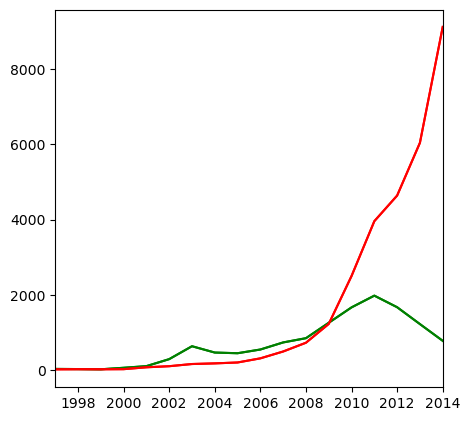

In [9]:
solo_in = df[df['CurrentState'] == 'In']
solo_out = df[df['CurrentState'] == 'Out']

solo_in = solo_in.groupby(['yearOfStart']).agg({'yearOfStart': ['count'], 'CurrentState': ['count']})

solo_out = solo_out.groupby(['yearOfStart']).agg({'yearOfStart': ['count'], 'CurrentState': ['count']})
plt.figure(figsize=(5,5), dpi=100) #Uso del objeto figure
plt.plot(solo_in, zorder=1, color='red', label='In')
plt.plot(solo_out, zorder=0, color='green', label='Out')
plt.xlim([1997,2014])
plt.show()

3). A partir de los resultados de 1) y 2), ¿cómo puede describir la tendencia en general?

<AxesSubplot:xlabel='unique_values', ylabel='counts'>

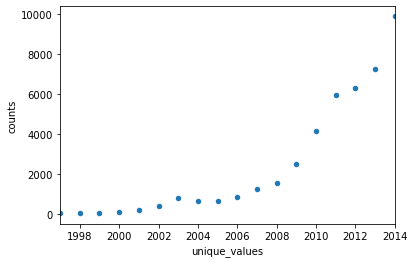

In [86]:
#Intento de realizar el scatter
from sklearn import linear_model
fil2 = pd.DataFrame(df.yearOfStart.value_counts().rename_axis('unique_values').reset_index(name='counts'))
fil2.plot.scatter(x = 'unique_values', y = 'counts', xlim=(1997,2014))


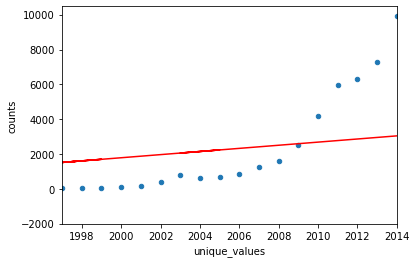

In [90]:
#Intento de realizar la regresión lineal
modelo = linear_model.LinearRegression()# Creo un modelo de regresión lineal
# Entreno el modelo con los datos (X,Y)
x = np.array(fil2.unique_values).reshape((-1,1))
y = np.array(fil2.counts)
modelo.fit(x, y)
R_sq = modelo.score(x,y)
y_pred = modelo.predict(x)
fil2.plot.scatter(x = 'unique_values', y = 'counts', xlim=(1997,2014))
plt.plot(x, y_pred, color='red')